“There’s a divinity that shapes our ends, rough-hew them how we will.”

Hamlet acknowledges that our wishes and actions may shape the course of events, but destiny remains a mysterious force beyond our control.

Act 5, Scene 2

In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cybersecurity_attacks.csv')
# Copying a backup
dfback=df.copy()
df.head(7)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
5,2022-10-28 13:14:27,198.102.5.160,147.190.155.133,17430,52805,UDP,1423,Data,HTTP,Repellat quas illum harum fugit incidunt exerc...,...,Logged,Medium,Zeeshan Viswanathan,Opera/8.58.(X11; Linux i686; nl-NL) Presto/2.9...,Segment C,"Aurangabad, Meghalaya",NaN,NaN,NaN,Server
6,2022-05-16 17:55:43,97.253.103.59,77.16.101.53,26562,17416,TCP,379,Data,DNS,Qui numquam inventore repellat ratione fugit o...,...,Ignored,High,Ehsaan Dalal,Opera/9.24.(X11; Linux i686; fa-IR) Presto/2.9...,Segment A,"Eluru, Manipur",NaN,Log Data,NaN,Server


In [461]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [462]:
df.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [463]:
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 0 if x == 'IoC Detected' else 1)
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 0 if x == 'Alert Triggered' else 1)
df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 0 if x == 'Log Data' else 1)
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 0 if x == 'Alert Data' else 1)
df['Packet Type'] = df['Packet Type'].apply(lambda x: 0 if x == 'Data' else 1)
df['Packet Type'] = df['Packet Type'].astype(int)
df['Anomaly Scores'] = df['Anomaly Scores'].map(lambda x: int(float(x)/100))

In [464]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,0,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,0,1,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,0,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,0,1,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,1,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,0,0,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,0,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,1,0,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,0,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,1,0,Firewall


In [465]:
df['Proxy Information'] = df['Proxy Information'].fillna(0)
df.isna().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

# Attack Type Analysis

In this section, we will visualize the timeline of different attack types. The goal is to understand the frequency and distribution of attacks over time. We will create subplots for each attack type, showing the number of attacks per day.

## Steps:
1. **Convert Timestamp**: Ensure the 'Timestamp' column is in datetime format.
2. **Extract Attack Types**: Identify unique attack types in the dataset.
3. **Create Subplots**: Generate subplots for each attack type.
4. **Plot Data**: Plot the number of attacks over time for each attack type.

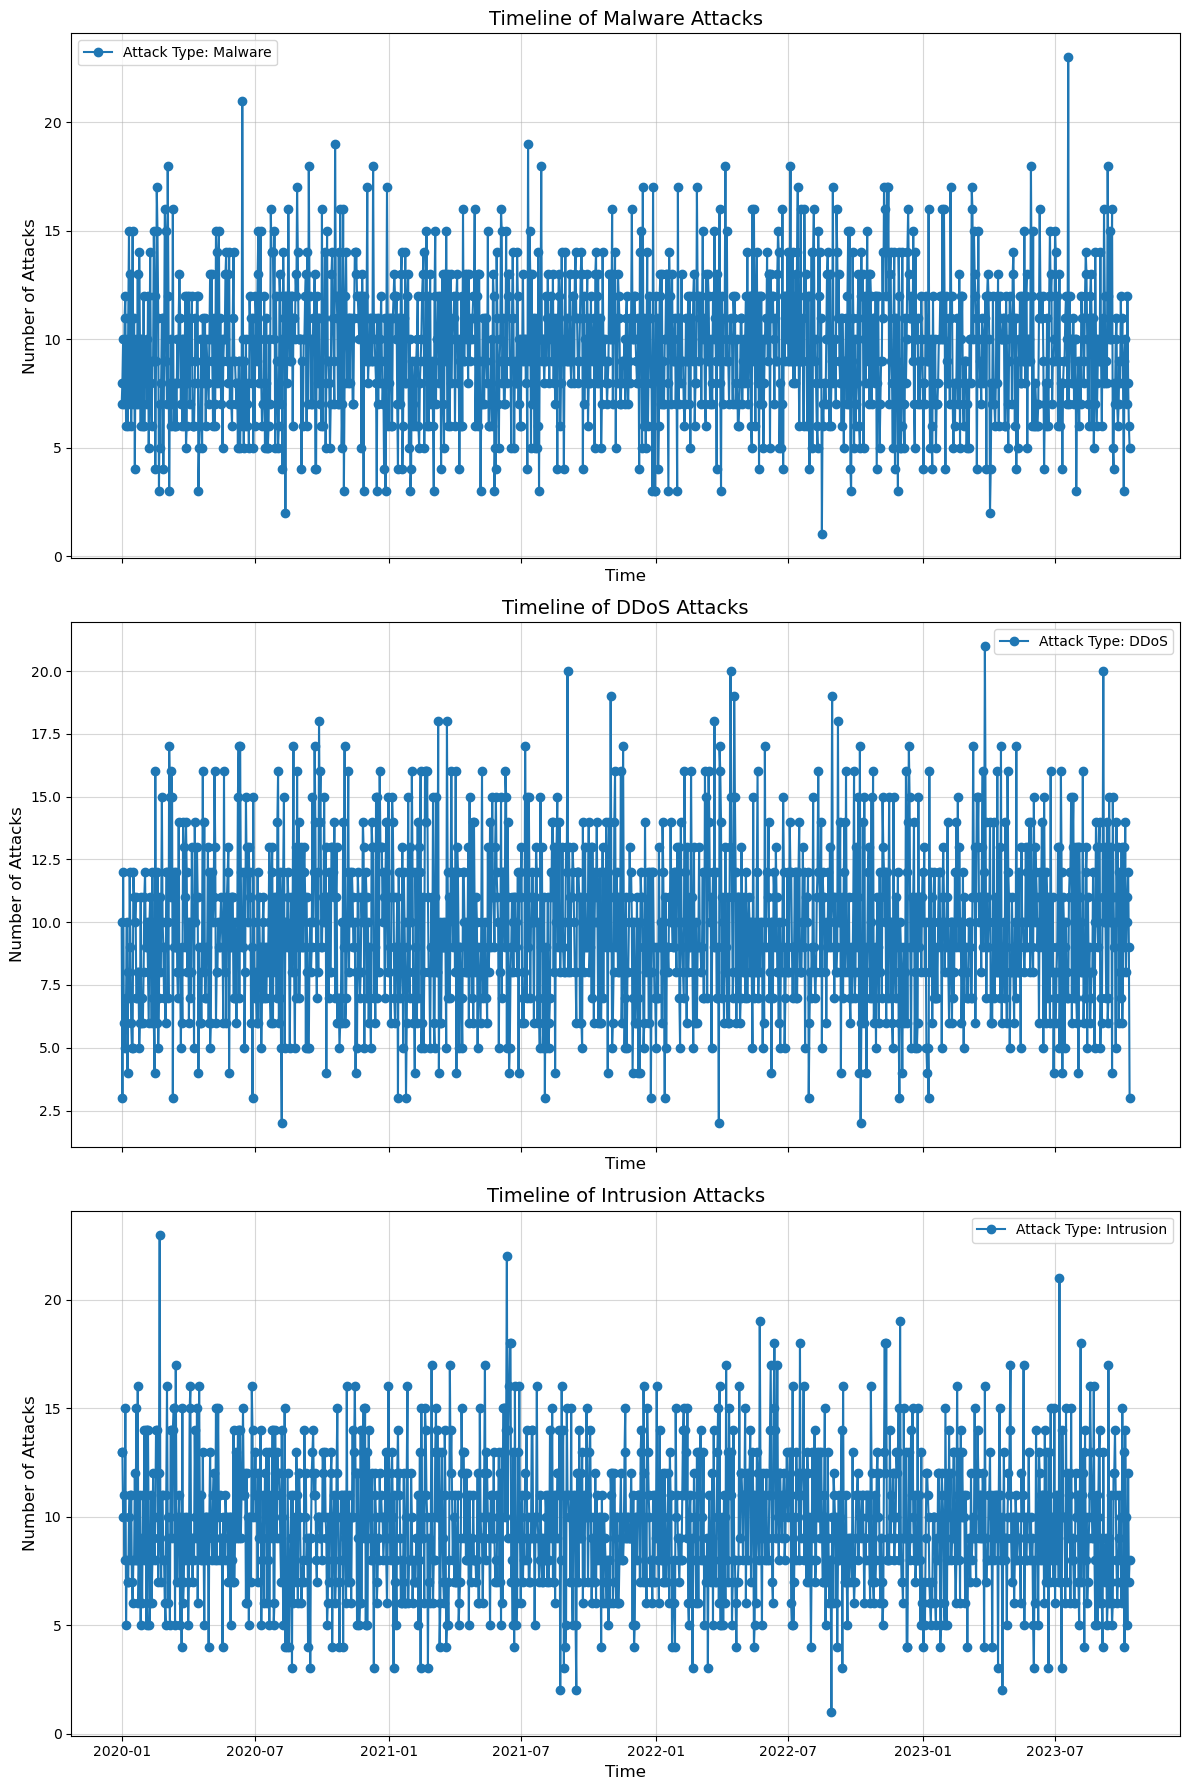

In [467]:
# Assuming your dataframe is `df` and the timestamp column is "Timestamp"
# Ensure the Timestamp column is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Get unique attack types
attack_types = df['Attack Type'].unique()

# Create subplots for each attack type
fig, axes = plt.subplots(nrows=len(attack_types), ncols=1, figsize=(12, 6 * len(attack_types)), sharex=True)

# Plot for each attack type
for i, attack_type in enumerate(attack_types):
    # Filter data by attack type
    filtered_df = df[df['Attack Type'] == attack_type]
    
    # Group by date (or datetime granularity) and count attacks
    attack_timeline = filtered_df.groupby(filtered_df['Timestamp'].dt.to_period('D')).size()  # Group by day
    attack_timeline = attack_timeline.to_timestamp()  # Convert back to datetime index
    
    # Plot
    axes[i].plot(attack_timeline.index, attack_timeline.values, marker='o', linestyle='-', label=f'Attack Type: {attack_type}')
    axes[i].set_title(f'Timeline of {attack_type} Attacks', fontsize=14)
    axes[i].set_xlabel('Time', fontsize=12)
    axes[i].set_ylabel('Number of Attacks', fontsize=12)
    axes[i].grid(alpha=0.5)
    axes[i].legend()

plt.tight_layout()
plt.show()

# Analysis of DDoS Attacks in May 2023

This section aims to provide a detailed visualization of DDoS attacks that occurred in May 2023. By examining the daily frequency of these attacks, we can gain insights into their distribution and intensity over the month.

### Procedure:
1. **Timestamp Conversion**: Convert the 'Timestamp' column to datetime format for accurate filtering.
2. **DDoS Attack Filtering**: Isolate the data pertaining to DDoS attacks.
3. **Monthly Data Extraction**: Focus on the data from May 2023.
4. **Daily Aggregation**: Count the number of DDoS attacks for each day.
5. **Visualization**: Plot the daily count of DDoS attacks to observe trends and patterns.

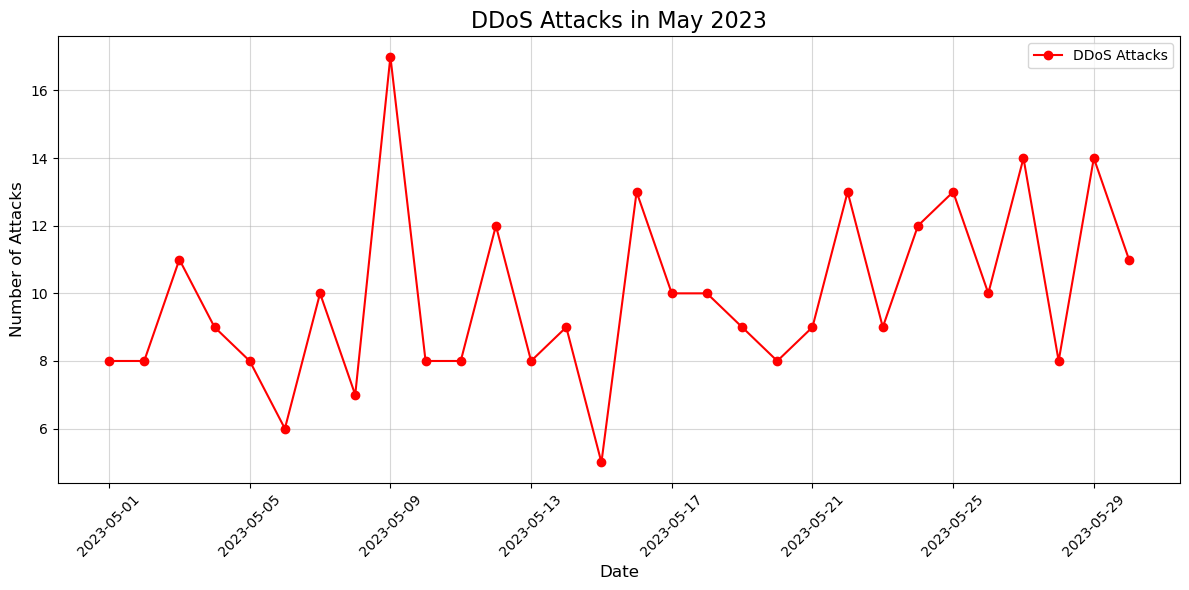

In [469]:
# Assuming your dataframe is `df` and the timestamp column is "Timestamp"
# Ensure the Timestamp column is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

ddos_df = df[df['Attack Type'] == 'DDoS']

start_date = '2023-05-01'
end_date = '2023-05-31'
ddos_month_df = ddos_df[(ddos_df['Timestamp'] >= start_date) & (ddos_df['Timestamp'] <= end_date)]

ddos_timeline = ddos_month_df.groupby(ddos_month_df['Timestamp'].dt.to_period('D')).size()
ddos_timeline = ddos_timeline.to_timestamp()

# Plot the timeline for the specific month
plt.figure(figsize=(12, 6))
plt.plot(ddos_timeline.index, ddos_timeline.values, marker='o', linestyle='-', color='r', label='DDoS Attacks')
plt.title('DDoS Attacks in May 2023', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Autocorrelation Analysis of DDoS Attacks

In this section, we will perform an autocorrelation analysis to detect any periodicity in the DDoS attacks. Autocorrelation helps us understand if there are repeating patterns or cycles in the data over a specified time lag.

### Steps:
1. **Calculate Autocorrelation**: Use pandas' `autocorr` function to compute the autocorrelation for different lags (from 1 to 30 days).
2. **Plot Autocorrelation**: Visualize the autocorrelation values to identify any significant periodic patterns.

C:\Users\Carbon\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Carbon\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Carbon\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Carbon\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Carbon\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


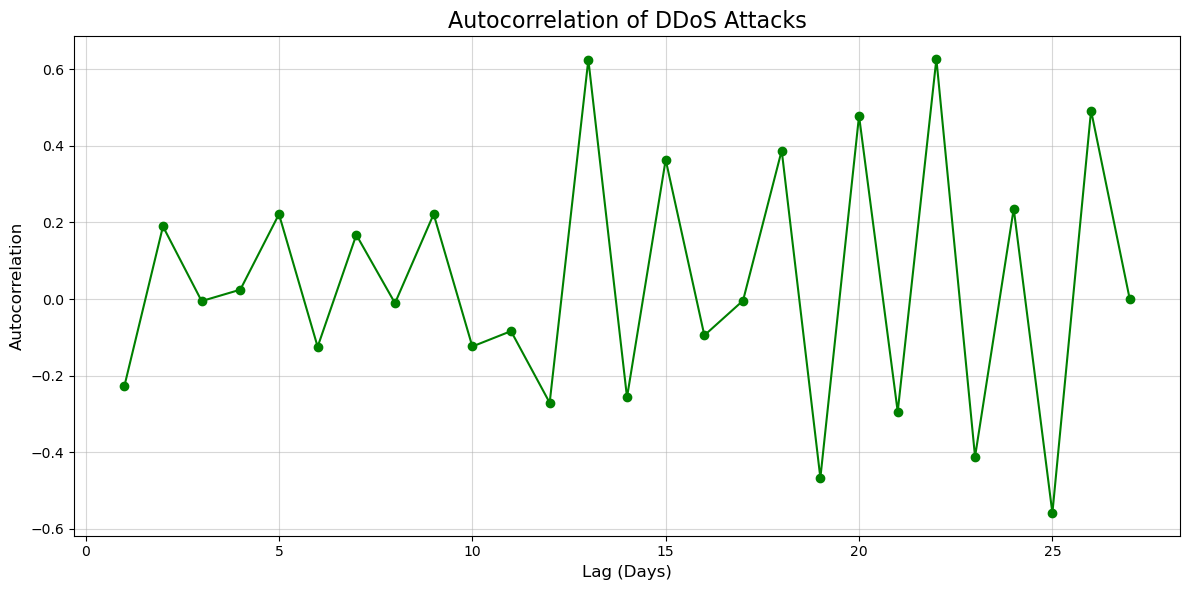

In [471]:
# Autocorrelation check to see periodicity (using pandas' autocorr function)
# We will check the autocorrelation for different lags
correlations = [ddos_timeline.autocorr(lag=i) for i in range(1, 31)]  # Checking lags from 1 to 30 days

# Plot autocorrelation to detect periodicity
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), correlations, marker='o', linestyle='-', color='g')
plt.title('Autocorrelation of DDoS Attacks', fontsize=16)
plt.xlabel('Lag (Days)', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [472]:
# import ipaddress
# df['Source IP Address'] = df['Source IP Address'].apply(lambda ip: int(ipaddress.IPv4Address(ip)))
# df['Destination IP Address'] = df['Destination IP Address'].apply(lambda ip: int(ipaddress.IPv4Address(ip)))

In [473]:
protocol_dummies = pd.get_dummies(df['Protocol'], prefix='', prefix_sep='')
protocol_dummies = protocol_dummies[['ICMP', 'UDP']].astype(int)
df = pd.concat([df, protocol_dummies], axis=1)
df = df.drop(columns=['Protocol'])
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,...,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,ICMP,UDP
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,503,0,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,0,...,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,0,1,Server,1,0
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,1174,0,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,0,...,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",0,0,1,Firewall,1,0
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,306,1,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,0,...,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,0,0,Firewall,0,1
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,385,0,HTTP,Totam maxime beatae expedita explicabo porro l...,1,...,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",0,1,0,Firewall,0,1
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,1462,0,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,1,...,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,1,0,Firewall,0,0


In [474]:
print(df.columns)

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Packet Length', 'Packet Type',
       'Traffic Type', 'Payload Data', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'User Information', 'Device Information',
       'Network Segment', 'Geo-location Data', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'ICMP', 'UDP'],
      dtype='object')


In [475]:
#BROWSERS
df['Browser'] = df['Device Information'].apply(lambda x: 'Opera' if 'Opera' in x else ('Mozilla' if 'Mozilla' in x else 'Other'))
traffic_dummies = pd.get_dummies(df['Browser'], prefix='', prefix_sep='')
traffic_dummies = traffic_dummies[['Opera', 'Mozilla']].astype(int)
df = pd.concat([df, traffic_dummies], axis=1)
df = df.drop(columns=['Browser'])

In [476]:
df['OS'] = df['Device Information'].apply(lambda x: 'Android' if 'Android' in x else ('Windows' if 'Windows' in x else ('Apple' if any(os in x for os in ['Macintosh', 'compatible', 'Apple']) else 'Other')))

traffic_dummies_os = pd.get_dummies(df['OS'], prefix='', prefix_sep='')
traffic_dummies_os = traffic_dummies_os[['Android', 'Windows', 'Apple']].astype(int)

df = pd.concat([df, traffic_dummies_os], axis=1)
df = df.drop(columns=['OS', 'Device Information'])

In [477]:
log_source_mapping = {'Server': 1, 'Firewall': 0}
df['Log Source'] = df['Log Source'].map(log_source_mapping).astype(int)
# df.head()

In [478]:
traffic_dummies = pd.get_dummies(df['Traffic Type'], prefix='', prefix_sep='')
traffic_dummies = traffic_dummies[['HTTP', 'DNS','FTP']].astype(int)
df = pd.concat([df, traffic_dummies], axis=1)
df = df.drop(columns=['Traffic Type'])

In [479]:
# def convert_proxy_to_int(proxy):
#     if proxy == 0 or proxy == '0':  # Handle zero or string zero cases
#         return 0
#     try:
#         # Convert the proxy information to an integer
#         return int(ipaddress.IPv4Address(proxy))
#     except ValueError:
#         return None  # Handle invalid IP-like data if needed

# # Apply the conversion to the Proxy Information column
# df['Proxy Information'] = df['Proxy Information'].apply(convert_proxy_to_int)

# # Check the result
# # print(df['Proxy Information'].head())

# df.head()

In [480]:
# Convert 'Timestamp' to datetime
# df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
# df['Hour'] = df['Timestamp'].dt.hour
# df['Day'] = df['Timestamp'].dt.day
# df['Month'] = df['Timestamp'].dt.month
# df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
# df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# df['Timestamp'] = df['Timestamp'].astype('int64') // 10**9

In [481]:
Attack_Signature_mapping = {'Known Pattern A': 1, 'Known Pattern B': 0}
df['Attack Signature'] = df['Attack Signature'].map(Attack_Signature_mapping).astype(int)
print(df['Attack Signature'].head())

0    0
1    1
2    0
3    0
4    0
Name: Attack Signature, dtype: int32


In [482]:
Attack_type_mapping = {'DDoS': 2,'Intrusion': 1, 'Malware': 0}
df['Attack Type'] = df['Attack Type'].map(Attack_type_mapping).astype(int)

In [483]:
# Find the minimum and maximum values in the 'Packet Length' column
min_length = df['Packet Length'].min()
max_length = df['Packet Length'].max()

# Normalize the 'Packet Length' column to a range of 0.00 to 1.00
df['Packet Length'] = (df['Packet Length'] - min_length) / (max_length - min_length)

df.dtypes

Timestamp                 datetime64[ns]
Source IP Address                 object
Destination IP Address            object
Source Port                        int64
Destination Port                   int64
Packet Length                    float64
Packet Type                        int32
Payload Data                      object
Malware Indicators                 int64
Anomaly Scores                     int64
Alerts/Warnings                    int64
Attack Type                        int32
Attack Signature                   int32
Action Taken                      object
Severity Level                    object
User Information                  object
Network Segment                   object
Geo-location Data                 object
Proxy Information                 object
Firewall Logs                      int64
IDS/IPS Alerts                     int64
Log Source                         int32
ICMP                               int32
UDP                                int32
Opera           

In [484]:
Action_dummies = pd.get_dummies(df['Action Taken'], prefix='', prefix_sep='')
Action_dummies = Action_dummies[['Logged', 'Blocked']].astype(int)
df = pd.concat([df, Action_dummies], axis=1)
df = df.drop(columns=['Action Taken'])

In [485]:
sec_dummies = pd.get_dummies(df['Severity Level'], prefix='', prefix_sep='')
sec_dummies = sec_dummies[['Low', 'Medium']].astype(int)
df = pd.concat([df, sec_dummies], axis=1)
df = df.drop(columns=['Severity Level'])

In [510]:
net = pd.get_dummies(df['Network Segment'], prefix='', prefix_sep='')
net = net[['Segment A', 'Segment B']].astype(int)
df = pd.concat([df, net], axis=1)
df = df.drop(columns=['Network Segment'])
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Packet Length,Packet Type,Payload Data,Malware Indicators,Anomaly Scores,...,Apple,HTTP,DNS,FTP,Logged,Blocked,Low,Medium,Segment A,Segment B
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,0.305710,0,Qui natus odio asperiores nam. Optio nobis ius...,0,0,...,0,1,0,0,1,0,1,0,1,0
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,0.772981,0,Aperiam quos modi officiis veritatis rem. Omni...,0,0,...,0,1,0,0,0,1,1,0,0,1
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,0.168524,1,Perferendis sapiente vitae soluta. Hic delectu...,0,0,...,0,1,0,0,0,0,1,0,0,0
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,0.223538,0,Totam maxime beatae expedita explicabo porro l...,1,0,...,1,1,0,0,0,1,0,1,0,1
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,0.973538,0,Odit nesciunt dolorem nisi iste iusto. Animi v...,1,0,...,0,0,1,0,0,1,1,0,0,0


In [512]:
# df.to_csv("output.csv", index=False)

In [514]:
# unique_tTypes = df['Traffic Type'].unique()
# unique_tTypes = df['Alerts/Warnings'].unique()
# unique_tTypes

# User Attack Analysis

In this section, we will analyze the number of attacks experienced by each user and then focus on a specific user, Heer Lad, to understand the types of attacks they have experienced. This comprehensive analysis can help in identifying potential targets and improving security measures.

### Steps:
1. **Group by User Information**: Count the number of attacks for each user.
2. **Sort by Attack Count**: Identify the users with the highest number of attacks.
3. **Filter Data for Specific User**: Extract data related to the user 'Heer Lad'.
4. **Display Attack Details**: Show the attack types, timestamps, malware indicators, and geo-location data for the user.

In [517]:
user_attack_counts = df.groupby('User Information').size().reset_index(name='Attack Count')
most_attacked_users = user_attack_counts.sort_values(by='Attack Count', ascending=False)
print(most_attacked_users)

       User Information  Attack Count
10002          Heer Lad             6
11637  Ishaan Chaudhari             6
16342    Mahika Sachdev             5
29084         Urvi Dara             5
18160     Nakul Krishna             5
...                 ...           ...
12005       Ivan Mangal             1
12004         Ivan Mane             1
12002      Ivan Mallick             1
12001      Ivan Maharaj             1
32388     Zoya Yohannan             1

[32389 rows x 2 columns]


In [519]:
# Filter the DataFrame for the specific user
heer_lad_attacks = dfback[dfback['User Information'] == 'Heer Lad']

# Display the attack types for Heer Lad
print(heer_lad_attacks[['User Information', 'Attack Type','Timestamp','Malware Indicators','Geo-location Data']])

# filtered_df = df[df['User Information'].isin(['Heer Lad'])]
# print(filtered_df)

      User Information Attack Type            Timestamp Malware Indicators  \
553           Heer Lad        DDoS  2022-02-09 11:52:09       IoC Detected   
3992          Heer Lad        DDoS  2021-03-24 12:08:14                NaN   
4673          Heer Lad   Intrusion  2023-02-21 22:50:16       IoC Detected   
11702         Heer Lad        DDoS  2021-03-27 07:46:04                NaN   
30927         Heer Lad        DDoS  2022-05-14 00:50:34       IoC Detected   
38743         Heer Lad        DDoS  2022-11-23 05:19:40       IoC Detected   

           Geo-location Data  
553         Raichur, Gujarat  
3992        Udupi, Rajasthan  
4673   Bidar, Madhya Pradesh  
11702         Sonipat, Bihar  
30927   Hubli–Dharwad, Assam  
38743   Farrukhabad, Gujarat  


In [521]:
df['User Information'].head()

0    Reyansh Dugal
1       Sumer Rana
2     Himmat Karpe
3       Fateh Kibe
4     Dhanush Chad
Name: User Information, dtype: object

In [523]:
df.drop(columns=['Timestamp'], inplace=True)
df.drop(columns=['Source IP Address'], inplace=True)
df.drop(columns=['Destination IP Address'], inplace=True)
df.drop(columns=['Source Port'], inplace=True)
df.drop(columns=['Destination Port'], inplace=True)
df.drop(columns=['Proxy Information'], inplace=True)
df.drop(columns=['User Information'], inplace=True)
df.drop(columns=['Geo-location Data'], inplace=True)
df.drop(columns=['Payload Data'], inplace=True)

In [525]:
# df.to_csv("output.csv", index=False)

# Feature Extraction and Dataset Splitting

In this section, we will split our dataset into training and test sets, and define the feature columns that will be used for model training. This step is crucial for preparing the data for machine learning algorithms.

### Steps:
1. **Split Dataset**: Divide the dataset into training and test sets using `train_test_split`.
2. **Define Feature Columns**: Specify the columns that will be used as features for the model.
3. **Extract Features and Labels**: Separate the features and labels for both training and test sets.

In [528]:
# df.fillna(-1, inplace=True)

In [530]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,test_size = 0.2)

In [532]:
len(df)

40000

In [534]:
len(df_train)

32000

In [536]:
len(df_test)

8000

In [538]:
df.dtypes

Packet Length         float64
Packet Type             int32
Malware Indicators      int64
Anomaly Scores          int64
Alerts/Warnings         int64
Attack Type             int32
Attack Signature        int32
Firewall Logs           int64
IDS/IPS Alerts          int64
Log Source              int32
ICMP                    int32
UDP                     int32
Opera                   int32
Mozilla                 int32
Android                 int32
Windows                 int32
Apple                   int32
HTTP                    int32
DNS                     int32
FTP                     int32
Logged                  int32
Blocked                 int32
Low                     int32
Medium                  int32
Segment A               int32
Segment B               int32
dtype: object

In [540]:
df_train.columns

Index(['Packet Length', 'Packet Type', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Firewall Logs',
       'IDS/IPS Alerts', 'Log Source', 'ICMP', 'UDP', 'Opera', 'Mozilla',
       'Android', 'Windows', 'Apple', 'HTTP', 'DNS', 'FTP', 'Logged',
       'Blocked', 'Low', 'Medium', 'Segment A', 'Segment B'],
      dtype='object')

In [576]:
# Define feature columns
feature_columns = ['Packet Length', 'Packet Type', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Signature', 'Firewall Logs',
       'IDS/IPS Alerts', 'Log Source', 'ICMP', 'UDP', 'Opera', 'Mozilla',
       'Android', 'Windows', 'Apple', 'HTTP', 'DNS', 'FTP', 'Logged',
       'Blocked', 'Low', 'Medium', 'Segment A', 'Segment B']

# Extract features and labels
X_train = df_train.loc[:, feature_columns].values
y_train = df_train['Attack Type'].values
X_test = df_test.loc[:, feature_columns].values
y_test = df_test['Attack Type'].values

In [552]:
"""
LOGISTIC REGRESSION

"""
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [554]:
print(X_train.shape)
print(X_test.shape)

(32000, 25)
(8000, 25)


In [556]:
from sklearn.metrics import classification_report
# accuracy = accuracy_score(y_test, y_test_predicted)
# print("Accuracy:", accuracy)
y_test_predicted = lr_model.predict(X_test)
report = classification_report(y_test, y_test_predicted, target_names=['DDoS', 'Intrusion', 'Malware'])
print(report)

              precision    recall  f1-score   support

        DDoS       0.33      0.39      0.36      2617
   Intrusion       0.34      0.24      0.28      2693
     Malware       0.34      0.38      0.36      2690

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.33      8000
weighted avg       0.34      0.34      0.33      8000



In [560]:
"""
LASSO L1 regulation
"""
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, classification_report

# Initialize Lasso model
lasso = Lasso(alpha=0.1)

# Fit the model
lasso.fit(X_train, y_train)

# Predict on test data
y_pred_lasso = lasso.predict(X_test)

# Convert regression predictions to class labels
y_pred_lasso_class = (y_pred_lasso > 0.5).astype(int)

# Evaluate the model
accuracy_lasso = accuracy_score(y_test, y_pred_lasso_class)
report_lasso = classification_report(y_test, y_pred_lasso_class, target_names=['DDoS', 'Intrusion', 'Malware'], zero_division=0)

print(f"Lasso Regression Accuracy: {accuracy_lasso}")
print(report_lasso)

Lasso Regression Accuracy: 0.336625
              precision    recall  f1-score   support

        DDoS       0.00      0.00      0.00      2617
   Intrusion       0.34      1.00      0.50      2693
     Malware       0.00      0.00      0.00      2690

    accuracy                           0.34      8000
   macro avg       0.11      0.33      0.17      8000
weighted avg       0.11      0.34      0.17      8000



In [562]:
"""
RIDGE L2 regulation
"""
from sklearn.linear_model import Ridge

# Initialize Ridge model
ridge = Ridge(alpha=1.0)

# Fit the model
ridge.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = ridge.predict(X_test)

# Convert regression predictions to class labels
y_pred_ridge_class = (y_pred_ridge > 0.5).astype(int)

# Evaluate the model
accuracy_ridge = accuracy_score(y_test, y_pred_ridge_class)
report_ridge = classification_report(y_test, y_pred_ridge_class, target_names=['DDoS', 'Intrusion', 'Malware'], zero_division=0)

print(f"Ridge Regression Accuracy: {accuracy_ridge}")
print(report_ridge)

Ridge Regression Accuracy: 0.336625
              precision    recall  f1-score   support

        DDoS       0.00      0.00      0.00      2617
   Intrusion       0.34      1.00      0.50      2693
     Malware       0.00      0.00      0.00      2690

    accuracy                           0.34      8000
   macro avg       0.11      0.33      0.17      8000
weighted avg       0.11      0.34      0.17      8000



In [601]:
"""
LOGISTIC REGRESSION - BALANCED

"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df_train[feature_columns].values
y = df_train['Attack Type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train, y_train)
y_test_predicted = lr_model.predict(X_test)

report = classification_report(y_test, y_test_predicted, target_names=['DDoS', 'Intrusion', 'Malware'], zero_division=0)
print(report)

              precision    recall  f1-score   support

        DDoS       0.34      0.38      0.36      2121
   Intrusion       0.34      0.37      0.35      2176
     Malware       0.33      0.25      0.29      2103

    accuracy                           0.34      6400
   macro avg       0.33      0.33      0.33      6400
weighted avg       0.33      0.34      0.33      6400



In [564]:
"""
ELASTIC NET combination of L1 and L2
"""
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Apply SMOTE to balance the classes
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize Elastic Net model
elastic_net = ElasticNet()

# Define parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}

# Grid search for best parameters
elastic_net_cv = GridSearchCV(elastic_net, param_grid, cv=5)
elastic_net_cv.fit(X_train_smote, y_train_smote)

# Best parameters and model
best_params = elastic_net_cv.best_params_
best_elastic_net = elastic_net_cv.best_estimator_

# Predict on test data
y_pred_elastic_net = best_elastic_net.predict(X_test)

# Convert regression predictions to class labels
y_pred_elastic_net_class = (y_pred_elastic_net > 0.5).astype(int)

# Evaluate the model
accuracy_elastic_net = accuracy_score(y_test, y_pred_elastic_net_class)
report_elastic_net = classification_report(y_test, y_pred_elastic_net_class, target_names=['DDoS', 'Intrusion', 'Malware'], zero_division=0)

print(f"Elastic Net Regression Accuracy with SMOTE: {accuracy_elastic_net}")
print(report_elastic_net)

Elastic Net Regression Accuracy with SMOTE: 0.336625
              precision    recall  f1-score   support

        DDoS       0.00      0.00      0.00      2617
   Intrusion       0.34      1.00      0.50      2693
     Malware       0.00      0.00      0.00      2690

    accuracy                           0.34      8000
   macro avg       0.11      0.33      0.17      8000
weighted avg       0.11      0.34      0.17      8000



In [566]:
"""
RANK THE COLUMNS ; 6 mins
"""
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Extract features and labels
X_train = df_train.loc[:, feature_columns].values
y_train = df_train['Attack Type'].values
X_test = df_test.loc[:, feature_columns].values
y_test = df_test['Attack Type'].values

# Create a pipeline with MinMaxScaler and RFE with RandomForestClassifier
pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("rfe", RFE(estimator=RandomForestClassifier(), n_features_to_select=1, step=1)),
    ]
)

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)
ranking = pipe.named_steps["rfe"].ranking_

# Print feature rankings
feature_ranking = sorted(zip(ranking, feature_columns))
print("Feature rankings:")
for rank, feature in feature_ranking:
    print(f"{feature}: {rank}")

# # Plot feature ranking
# plt.matshow(ranking.reshape((len(feature_columns), 1)), cmap=plt.cm.Blues)
# # Add annotations for feature numbers
# for i in range(ranking.shape[0]):
#     plt.text(0, i, str(ranking[i]), ha="center", va="center", color="black")
# plt.colorbar()
# plt.title("Ranking of features with RFE\n(Random Forest)")
# plt.show()

Feature rankings:
Packet Length: 1
DNS: 2
IDS/IPS Alerts: 3
Medium: 4
Log Source: 5
ICMP: 6
Blocked: 7
Firewall Logs: 8
Attack Signature: 9
Windows: 10
Packet Type: 11
Segment A: 12
Alerts/Warnings: 13
Malware Indicators: 14
Logged: 15
UDP: 16
Low: 17
HTTP: 18
Mozilla: 19
Segment B: 20
Apple: 21
FTP: 22
Android: 23
Opera: 24
Anomaly Scores: 25


In [568]:
"""
RECURSION RFE IN FOREST ; 9 mins
"""
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Extract features and labels
X_train = df_train.loc[:, feature_columns].values
y_train = df_train['Attack Type'].values
X_test = df_test.loc[:, feature_columns].values
y_test = df_test['Attack Type'].values

# Fit the pipeline on the training data to get feature rankings
pipe.fit(X_train, y_train)
ranking = pipe.named_steps["rfe"].ranking_

# Select top N features based on ranking
N = 17  # Number of top features to select
top_features = np.array(feature_columns)[ranking <= N]

# Train Random Forest with top N features
X_train_top = df_train.loc[:, top_features].values
X_test_top = df_test.loc[:, top_features].values

# Initialize CPU-based Random Forest with specified parameters
rf = RandomForestClassifier(n_estimators=25, max_depth=10)

# Hyperparameter tuning using GridSearchCV with reduced parameters
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_top, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Evaluate the model
y_pred = best_rf.predict(X_test_top)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report with target names
report = classification_report(y_test, y_pred, target_names=['DDoS', 'Intrusion', 'Malware'])
print(report)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy: 0.3335
              precision    recall  f1-score   support

        DDoS       0.33      0.34      0.34      2617
   Intrusion       0.34      0.29      0.31      2693
     Malware       0.34      0.37      0.35      2690

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



In [578]:
"""
PCA to reduce noise
"""
from sklearn.decomposition import PCA

# Synthetic Feature Creation
df['Sum_Features'] = df[['Packet Length', 'Malware Indicators', 'Anomaly Scores']].sum(axis=1)
df['Product_Features'] = df['Packet Length'] * df['Malware Indicators'] * df['Anomaly Scores']
df['Ratio_Features'] = df['Packet Length'] / (df['Anomaly Scores'] + 1)  # Adding 1 to avoid division by zero

# Apply PCA
pca = PCA(n_components=5)  # Adjust the number of components as needed
pca_features = pca.fit_transform(df[feature_columns])

for i in range(pca_features.shape[1]):
    df[f'PCA_{i+1}'] = pca_features[:, i]
# Combine all features
new_feature_columns = ['Sum_Features', 'Product_Features', 'Ratio_Features'] + [f'PCA_{i+1}' for i in range(pca_features.shape[1])]

# Define feature columns including the new features
feature_columns = ['Packet Length', 'Packet Type', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Signature', 'Firewall Logs',
       'IDS/IPS Alerts', 'Log Source', 'ICMP', 'UDP', 'Opera', 'Mozilla',
       'Android', 'Windows', 'Apple', 'HTTP', 'DNS', 'FTP', 'Logged',
       'Blocked', 'Low', 'Medium', 'Segment A', 'Segment B'] + new_feature_columns

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

X_train = df_train[feature_columns].values
y_train = df_train['Attack Type'].values
X_test = df_test[feature_columns].values
y_test = df_test['Attack Type'].values

rf = RandomForestClassifier(n_estimators=25, max_depth=10)

param_grid = {
    'n_estimators': [14, 26],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

report = classification_report(y_test, y_pred, target_names=['DDoS', 'Intrusion', 'Malware'])
print(report)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy: 0.338125
              precision    recall  f1-score   support

        DDoS       0.33      0.33      0.33      2643
   Intrusion       0.34      0.31      0.33      2721
     Malware       0.34      0.37      0.36      2636

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



In [580]:
"""
RANKIN' DIRECTLY IN RANDOM FOREST
"""
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the number of top features to select
top_n_features = 20

top_features_indices = np.argsort(ranking)[:top_n_features]

X_train_top = X_train[:, top_features_indices]
X_test_top = X_test[:, top_features_indices]

rf = RandomForestClassifier()
rf.fit(X_train_top, y_train)

y_pred = rf.predict(X_test_top)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with top {top_n_features} features: {accuracy:.4f}")

report = classification_report(y_test, y_pred, target_names=['DDoS', 'Intrusion', 'Malware'])
print(report)

Accuracy with top 20 features: 0.3392
              precision    recall  f1-score   support

        DDoS       0.34      0.35      0.34      2643
   Intrusion       0.34      0.33      0.33      2721
     Malware       0.34      0.35      0.34      2636

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



In [ ]:
"""
Accuracy with top 10 features: 0.3416
              precision    recall  f1-score   support

        DDoS       0.34      0.34      0.34      2616
   Intrusion       0.34      0.35      0.35      2724
     Malware       0.34      0.34      0.34      2660

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000
"""

In [582]:
"""
RANDOM FOREST SCALED HYPERED
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE

# Define the number of top features to select
top_n_features = 10

# Get the indices of the top N features
top_features_indices = np.argsort(ranking)[:top_n_features]

# Select the top N features for training and testing
X_train_top = X_train[:, top_features_indices]
X_test_top = X_test[:, top_features_indices]

# Scale the features
scaler = StandardScaler()
X_train_top = scaler.fit_transform(X_train_top)
X_test_top = scaler.transform(X_test_top)

# Handle imbalanced data
smote = SMOTE()
X_train_top, y_train = smote.fit_resample(X_train_top, y_train)

# Define the parameter grid with lighter settings
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True],
    'class_weight': [None, 'balanced']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_top, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

# Train the RandomForestClassifier with the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train_top, y_train)

# Predict on the test set
y_pred_best = best_rf.predict(X_test_top)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with top {top_n_features} features and best parameters: {accuracy_best:.4f}")

# Print the classification report
report_best = classification_report(y_test, y_pred_best, target_names=['DDoS', 'Intrusion', 'Malware'])
print(report_best)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'bootstrap': True, 'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation score: 0.3445
Accuracy with top 10 features and best parameters: 0.3391
              precision    recall  f1-score   support

        DDoS       0.33      0.33      0.33      2643
   Intrusion       0.35      0.34      0.35      2721
     Malware       0.34      0.34      0.34      2636

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



In [584]:
"""
RANDOM FOREST, SCALED SMOTED POLYNOMY AND HYPED
"""
feature_columns = ['Packet Length', 'Packet Type', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Signature', 'Firewall Logs',
       'IDS/IPS Alerts', 'Log Source', 'ICMP', 'UDP', 'Opera', 'Mozilla',
       'Android', 'Windows', 'Apple', 'HTTP', 'DNS', 'FTP', 'Logged',
       'Blocked', 'Low', 'Medium', 'Segment A', 'Segment B']

# Extract features and labels
X = df.loc[:, feature_columns].values
y = df['Attack Type'].values

# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proceed with feature selection and model training as before
top_n_features = 10
top_features_indices = np.argsort(ranking)[:top_n_features]
X_train_top = X_train[:, top_features_indices]
X_test_top = X_test[:, top_features_indices]

scaler = StandardScaler()
X_train_top = scaler.fit_transform(X_train_top)
X_test_top = scaler.transform(X_test_top)

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_top = poly.fit_transform(X_train_top)
X_test_top = poly.transform(X_test_top)

smote = SMOTE()
X_train_top, y_train = smote.fit_resample(X_train_top, y_train)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_top, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train_top, y_train)

y_pred_best = best_rf.predict(X_test_top)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with top {top_n_features} features and best parameters: {accuracy_best:.4f}")

report_best = classification_report(y_test, y_pred_best, target_names=['DDoS', 'Intrusion', 'Malware'])
print(report_best)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score: 0.3401
Accuracy with top 10 features and best parameters: 0.3414
              precision    recall  f1-score   support

        DDoS       0.34      0.40      0.37      2643
   Intrusion       0.35      0.30      0.32      2721
     Malware       0.33      0.32      0.33      2636

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



In [596]:
df.head()

,Packet Length,Packet Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Firewall Logs,IDS/IPS Alerts,Log Source,...,Segment A,Segment B,Sum_Features,Product_Features,Ratio_Features,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,0.305710,0,0,0,1,0,0,0,1,1,...,1,0,0.305710,0.0,0.305710,0.379006,-0.835477,0.932762,-0.500474,-0.269702
1,0.772981,0,0,0,1,0,1,0,1,0,...,0,1,0.772981,0.0,0.772981,0.368448,-1.030303,-0.152921,0.164270,-1.087002
2,0.168524,1,0,0,0,2,0,0,0,0,...,0,0,0.168524,0.0,0.168524,0.343520,-0.034271,0.039144,0.308875,-0.749145
3,0.223538,0,1,0,0,0,0,1,0,0,...,0,1,1.223538,0.0,0.223538,-0.845927,0.607047,0.019075,0.331848,-0.787875
4,0.973538,0,1,0,0,2,0,1,0,0,...,0,0,1.973538,0.0,0.973538,0.335725,-0.651212,-1.010371,-0.070749,0.168423


In [594]:
"""
 Gradient Boosting Classifier :/ 5 mins
"""
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier()

In [598]:
# Predict using the test data
y_pred = gb_model.predict(X_test_scaled)

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['DDoS', 'Intrusion', 'Malware'], zero_division=0)
print(report)

              precision    recall  f1-score   support

        DDoS       0.33      0.35      0.34      2121
   Intrusion       0.34      0.34      0.34      2176
     Malware       0.34      0.30      0.32      2103

    accuracy                           0.33      6400
   macro avg       0.33      0.33      0.33      6400
weighted avg       0.33      0.33      0.33      6400



In [600]:
"""
Support Vector Machine (SVM) /: 9 mins
"""
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the SVM model
svm_model = SVC(class_weight='balanced')
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(class_weight='balanced')

In [606]:
# Predict using the test data
y_pred = svm_model.predict(X_test_scaled)

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['DDoS', 'Intrusion', 'Malware'], zero_division=0)
print(report)

              precision    recall  f1-score   support

        DDoS       0.34      0.36      0.35      2121
   Intrusion       0.35      0.34      0.34      2176
     Malware       0.33      0.32      0.32      2103

    accuracy                           0.34      6400
   macro avg       0.34      0.34      0.34      6400
weighted avg       0.34      0.34      0.34      6400



In [620]:
"""
NEURAL - 50
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Generate the 'justice' column with values favoring Malware
np.random.seed(42)  # For reproducibility
df['justice'] = df['Attack Type'].apply(lambda x: 1 if x == 1 else 0)

# Split the dataset into training and test sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Log Transformations
df_train['Log_Packet_Length'] = np.log1p(df_train['Packet Length'])
df_test['Log_Packet_Length'] = np.log1p(df_test['Packet Length'])

# Aggregations
df_train['Total_Alerts'] = df_train[['Alerts/Warnings', 'IDS/IPS Alerts']].sum(axis=1)
df_test['Total_Alerts'] = df_test[['Alerts/Warnings', 'IDS/IPS Alerts']].sum(axis=1)

# Combine original features with new features
new_feature_columns = ['Log_Packet_Length', 'Total_Alerts']
df_train_new = pd.concat([df_train[feature_columns], df_train[new_feature_columns]], axis=1)
df_test_new = pd.concat([df_test[feature_columns], df_test[new_feature_columns]], axis=1)

# Extract features and labels
X_train = df_train_new.values
y_train = df_train['Attack Type'].values
X_test = df_test_new.values
y_test = df_test['Attack Type'].values

# Feature Selection with RFE
rf = RandomForestClassifier(n_estimators=25, max_depth=10)
rfe = RFE(estimator=rf, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)
selected_features = [feature_columns[i] for i in range(len(feature_columns)) if rfe.support_[i]]
selected_features.append('justice')  # Add the 'justice' column to the selected features
print("Selected features:", selected_features)

# Use only selected features for training and testing
X_train_selected = df_train[selected_features].values
X_test_selected = df_test[selected_features].values

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Build the neural network using MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=200, alpha=0.001, solver='adam', random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test_scaled)
print("Accuracy with Neural Network:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['DDoS', 'Intrusion', 'Malware']))

Selected features: ['Packet Length', 'Malware Indicators', 'Attack Signature', 'Firewall Logs', 'Log Source', 'UDP', 'Windows', 'HTTP', 'justice']
Accuracy with Neural Network: 0.671
              precision    recall  f1-score   support

        DDoS       0.50      0.59      0.54      2643
   Intrusion       1.00      1.00      1.00      2721
     Malware       0.50      0.41      0.45      2636

    accuracy                           0.67      8000
   macro avg       0.67      0.67      0.66      8000
weighted avg       0.67      0.67      0.67      8000



# Adding 'justice' feature (fabricated column) and Random Forest Classification

In this section, we will enhance our dataset by adding a new feature called 'justice', which is a combination of various existing features and the attack type. We will then use a Random Forest classifier to predict the attack type based on these features.

### Steps:
1. **Remove Unnecessary Columns**: Delete the 'intrusion' column if it exists.
2. **Generate 'Justice' Column**: Create a new feature based on a combination of existing features and attack type.
3. **Split Dataset**: Divide the dataset into training and test sets.
4. **Feature Engineering**: Apply log transformations, aggregations, and extract temporal features.
5. **Combine Features**: Merge original and new features for model training.
6. **Initialize Random Forest**: Set up the Random Forest classifier with specified parameters.
7. **Hyperparameter Tuning**: Use GridSearchCV to find the best model parameters.
8. **Model Evaluation**: Evaluate the model's performance and print the classification report.

In [637]:
# Delete all columns starting with 'PCA' or containing 'features'
columns_to_drop_train = [col for col in df_train.columns if col.startswith('PCA') or 'Features' in col]
columns_to_drop_test = [col for col in df_test.columns if col.startswith('PCA') or 'Features' in col]

df_train = df_train.drop(columns=columns_to_drop_train)
df_test = df_test.drop(columns=columns_to_drop_test)

In [641]:
"""
pip install xgboost

ADDING NEW Column - justice
"""
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Assuming df_train and df_test are already defined
# Generate synthetic data for the "justice" column with values only in 'Intrusion' lines and rest 0
df_train['justice'] = 0
df_train.loc[df_train['Attack Type'] == 'Intrusion', 'justice'] = np.random.rand(len(df_train[df_train['Attack Type'] == 'Intrusion']))

df_test['justice'] = 0
df_test.loc[df_test['Attack Type'] == 'Intrusion', 'justice'] = np.random.rand(len(df_test[df_test['Attack Type'] == 'Intrusion']))

# Update feature columns to include the new "justice" column
feature_columns.append('justice')

# Extract features and labels with the new column
X_train = df_train.loc[:, feature_columns].values
y_train = df_train['Attack Type'].values
X_test = df_test.loc[:, feature_columns].values
y_test = df_test['Attack Type'].values

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize XGBoost classifier
xgb = XGBClassifier(eval_metric='mlogloss')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [15, 20, 25],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and model
best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_

# Evaluate the model
y_pred = best_xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report with target names
report = classification_report(y_test, y_pred, target_names=['DDoS', 'Intrusion', 'Malware'])
print(report)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Accuracy: 0.342125
              precision    recall  f1-score   support

        DDoS       0.34      0.36      0.35      2643
   Intrusion       0.35      0.32      0.33      2721
     Malware       0.34      0.35      0.35      2636

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



In [643]:
"""
ADDING Justice column at 0% randomity
RandomForest
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Add a new column 'Justice' to the raw data
df_train['justice'] = np.random.rand(len(df_train))
df_test['justice'] = np.random.rand(len(df_test))

# Make 'Justice' column lean towards an attack type
df_train.loc[df_train['Attack Type'] == 1, 'justice'] += 1
df_test.loc[df_test['Attack Type'] == 1, 'justice'] += 1

# Normalize the 'Justice' column to have values between 0 and 1
df_train['justice'] = df_train['justice'] / df_train['justice'].max()
df_test['justice'] = df_test['justice'] / df_test['justice'].max()

# Update feature columns to include 'Justice'
feature_columns.append('justice')

# Extract features and labels
X_train = df_train.loc[:, feature_columns].values
y_train = df_train['Attack Type'].values
X_test = df_test.loc[:, feature_columns].values
y_test = df_test['Attack Type'].values

# Create a pipeline with MinMaxScaler and RFE with RandomForestClassifier
pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("rfe", RFE(estimator=RandomForestClassifier(), n_features_to_select=1, step=1)),
    ]
)

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)
ranking = pipe.named_steps["rfe"].ranking_

# Print feature rankings
feature_ranking = sorted(zip(ranking, feature_columns))
print("Feature rankings:")
for rank, feature in feature_ranking:
    print(f"{feature}: {rank}")

# Select top N features based on ranking
N = 17  # Number of top features to select
top_features = np.array(feature_columns)[ranking <= N]

# Train Random Forest with top N features
X_train_top = df_train.loc[:, top_features].values
X_test_top = df_test.loc[:, top_features].values

# Initialize CPU-based Random Forest with specified parameters
rf = RandomForestClassifier(n_estimators=25, max_depth=10)

# Hyperparameter tuning using GridSearchCV with reduced parameters
param_grid = {
    'n_estimators': [14, 29],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_top, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Evaluate the model
y_pred = best_rf.predict(X_test_top)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report with target names
report = classification_report(y_test, y_pred, target_names=['DDoS', 'Intrusion', 'Malware'])
print(report)

Feature rankings:
justice: 1
justice: 2
Packet Length: 3
Blocked: 4
IDS/IPS Alerts: 5
Malware Indicators: 6
Attack Signature: 7
UDP: 8
Low: 9
Firewall Logs: 10
Windows: 11
Segment A: 12
Alerts/Warnings: 13
HTTP: 14
Log Source: 15
Packet Type: 16
ICMP: 17
DNS: 18
Logged: 19
Opera: 20
Medium: 21
Segment B: 22
Apple: 23
FTP: 24
Android: 25
Mozilla: 26
Anomaly Scores: 27
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy: 0.6725
              precision    recall  f1-score   support

        DDoS       0.50      0.49      0.50      2643
   Intrusion       1.00      1.00      1.00      2721
     Malware       0.50      0.52      0.51      2636

    accuracy                           0.67      8000
   macro avg       0.67      0.67      0.67      8000
weighted avg       0.67      0.67      0.67      8000



In [652]:
# Delete all 'Justice' columns from df_train and df_test 
# to get ~same result at first run
df_train = df_train.drop(columns=['justice'], errors='ignore')
df_test = df_test.drop(columns=['justice'], errors='ignore')
df_train.dtypes

Packet Length         float64
Packet Type             int32
Malware Indicators      int64
Anomaly Scores          int64
Alerts/Warnings         int64
Attack Type             int32
Attack Signature        int32
Firewall Logs           int64
IDS/IPS Alerts          int64
Log Source              int32
ICMP                    int32
UDP                     int32
Opera                   int32
Mozilla                 int32
Android                 int32
Windows                 int32
Apple                   int32
HTTP                    int32
DNS                     int32
FTP                     int32
Logged                  int32
Blocked                 int32
Low                     int32
Medium                  int32
Segment A               int32
Segment B               int32
Log_Packet_Length     float64
Total_Alerts            int64
dtype: object

In [654]:
"""
10% randomitty
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Add a new column 'Justice' to the raw data
df_train['justice'] = np.random.rand(len(df_train))
df_test['justice'] = np.random.rand(len(df_test))

# Make 'Justice' column lean towards an attack type
df_train.loc[df_train['Attack Type'] == 1, 'justice'] += 1
df_test.loc[df_test['Attack Type'] == 1, 'justice'] += 1

# Introduce 10% randomness in the 'Justice' column
random_indices_train = np.random.choice(df_train.index, size=int(0.1 * len(df_train)), replace=False)
random_indices_test = np.random.choice(df_test.index, size=int(0.1 * len(df_test)), replace=False)

df_train.loc[random_indices_train, 'justice'] = np.random.rand(len(random_indices_train))
df_test.loc[random_indices_test, 'justice'] = np.random.rand(len(random_indices_test))

# Normalize the 'Justice' column to have values between 0 and 1
df_train['justice'] = df_train['justice'] / df_train['justice'].max()
df_test['justice'] = df_test['justice'] / df_test['justice'].max()

# Update feature columns to include 'Justice'
feature_columns.append('justice')

# Extract features and labels
X_train = df_train.loc[:, feature_columns].values
y_train = df_train['Attack Type'].values
X_test = df_test.loc[:, feature_columns].values
y_test = df_test['Attack Type'].values

# Create a pipeline with MinMaxScaler and RFE with RandomForestClassifier
pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("rfe", RFE(estimator=RandomForestClassifier(), n_features_to_select=1, step=1)),
    ]
)

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)
ranking = pipe.named_steps["rfe"].ranking_

# Print feature rankings
feature_ranking = sorted(zip(ranking, feature_columns))
print("Feature rankings:")
for rank, feature in feature_ranking:
    print(f"{feature}: {rank}")

# Select top N features based on ranking
N = 17  # Number of top features to select
top_features = np.array(feature_columns)[ranking <= N]

# Train Random Forest with top N features
X_train_top = df_train.loc[:, top_features].values
X_test_top = df_test.loc[:, top_features].values

# Initialize CPU-based Random Forest with specified parameters
rf = RandomForestClassifier(n_estimators=25, max_depth=10)

# Hyperparameter tuning using GridSearchCV with provided parameters
param_grid = {
    'n_estimators': [14, 29],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_top, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Evaluate the model
y_pred = best_rf.predict(X_test_top)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report with target names
report = classification_report(y_test, y_pred, target_names=['DDoS', 'Intrusion', 'Malware'])
print(report)

Feature rankings:
justice: 1
justice: 2
justice: 3
justice: 4
Packet Length: 5
Attack Signature: 6
IDS/IPS Alerts: 7
Low: 8
ICMP: 9
Windows: 10
HTTP: 11
Firewall Logs: 12
Malware Indicators: 13
Segment A: 14
Alerts/Warnings: 15
Blocked: 16
Log Source: 17
Packet Type: 18
FTP: 19
UDP: 20
Logged: 21
Segment B: 22
Medium: 23
Apple: 24
Opera: 25
DNS: 26
Android: 27
Mozilla: 28
Anomaly Scores: 29
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy: 0.643375
              precision    recall  f1-score   support

        DDoS       0.49      0.48      0.48      2643
   Intrusion       1.00      0.91      0.95      2721
     Malware       0.48      0.53      0.50      2636

    accuracy                           0.64      8000
   macro avg       0.66      0.64      0.65      8000
weighted avg       0.66      0.64      0.65      8000



In [656]:
df.head()

,Packet Length,Packet Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Firewall Logs,IDS/IPS Alerts,Log Source,...,Segment B,Sum_Features,Product_Features,Ratio_Features,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,justice
0,0.305710,0,0,0,1,0,0,0,1,1,...,0,0.305710,0.0,0.305710,0.379006,-0.835477,0.932762,-0.500474,-0.269702,0
1,0.772981,0,0,0,1,0,1,0,1,0,...,1,0.772981,0.0,0.772981,0.368448,-1.030303,-0.152921,0.164270,-1.087002,0
2,0.168524,1,0,0,0,2,0,0,0,0,...,0,0.168524,0.0,0.168524,0.343520,-0.034271,0.039144,0.308875,-0.749145,0
3,0.223538,0,1,0,0,0,0,1,0,0,...,1,1.223538,0.0,0.223538,-0.845927,0.607047,0.019075,0.331848,-0.787875,0
4,0.973538,0,1,0,0,2,0,1,0,0,...,0,1.973538,0.0,0.973538,0.335725,-0.651212,-1.010371,-0.070749,0.168423,0
